# 树状图

In [ ]:
# 有细分

import plotly.express as px
import plotly.graph_objects as go 
import pandas as pd
import webbrowser
import os
from pathlib import Path

# 数据汇总为三大类
data = {
    "漫步": 16 + 13 + 9 + 1 + 1 + 1 + 1,  # 42
    "游船": 10 + 6 + 5 + 4 + 1 + 1,       # 27
    "骑行": 2                              # 2
}

print("📊 三大出行方式统计:")
for category, value in data.items():
    percentage = value / sum(data.values()) * 100
    print(f"{category}: {value} ({percentage:.1f}%)")

# 准备数据
categories = list(data.keys())
values = list(data.values())
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # 蓝色、绿色、橙色

# 创建树状图数据
df = pd.DataFrame({
    'ids': ['root'] + categories,
    'labels': ['出行方式总计'] + [f"{cat}\n{val}次" for cat, val in data.items()],
    'parents': [''] + ['root'] * len(categories),
    'values': [sum(values)] + values
})

# 创建树状图
fig = go.Figure(go.Treemap(
    ids=df['ids'],
    labels=df['labels'],
    parents=df['parents'],
    values=df['values'],
    textinfo="label+percent root",
    textfont_size=16,
    textposition="middle center",
    marker=dict(
        colors=['#f8f9fa'] + colors,  # 根节点浅灰色，子节点用指定颜色
        showscale=False,
        line=dict(width=3, color='white')
    ),
    hovertemplate='<b>%{label}</b><br>数量: %{value}<br>占比: %{percentRoot:.1%}<extra></extra>',
    maxdepth=2
))

fig.update_layout(
    title={
        'text': '🚢🚶🚴 出行方式分布图<br><sub style="font-size:14px;">游船 vs 漫步 vs 骑行</sub>',
        'x': 0.5,
        'font': {'size': 24, 'color': '#2c3e50'}
    },
    font_size=14,
    width=1000,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# 获取用户主目录，避免权限问题
home_dir = Path.home()
html_file = home_dir / "出行方式分布图.html"

print(f"💾 准备保存到: {html_file}")

try:
    # 保存HTML文件到用户目录
    fig.write_html(str(html_file))
    print(f"✅ 文件保存成功！")
    
    # 自动在浏览器中打开
    webbrowser.open(f'file://{html_file}')
    print(f"🌐 浏览器已自动打开")
    
except Exception as e:
    print(f"❌ 保存文件时出错: {e}")
    # 如果保存失败，直接显示图表
    print("🔄 改为直接显示图表...")
    fig.show()

print(f"\n📁 文件位置: {html_file}")
print(f"\n🎯 结果一目了然:")
print(f"   🚢 游船占主导: {data['游船']/sum(data.values())*100:.1f}%")
print(f"   🚶 漫步占中等: {data['漫步']/sum(data.values())*100:.1f}%") 
print(f"   🚴 骑行占少数: {data['骑行']/sum(data.values())*100:.1f}%")

📊 三大出行方式统计:
漫步: 42 (59.2%)
游船: 27 (38.0%)
骑行: 2 (2.8%)
💾 准备保存到: /Users/elsa/出行方式分布图.html
✅ 文件保存成功！
🌐 浏览器已自动打开

📁 文件位置: /Users/elsa/出行方式分布图.html

🎯 结果一目了然:
   🚢 游船占主导: 38.0%
   🚶 漫步占中等: 59.2%
   🚴 骑行占少数: 2.8%


## 雷达图

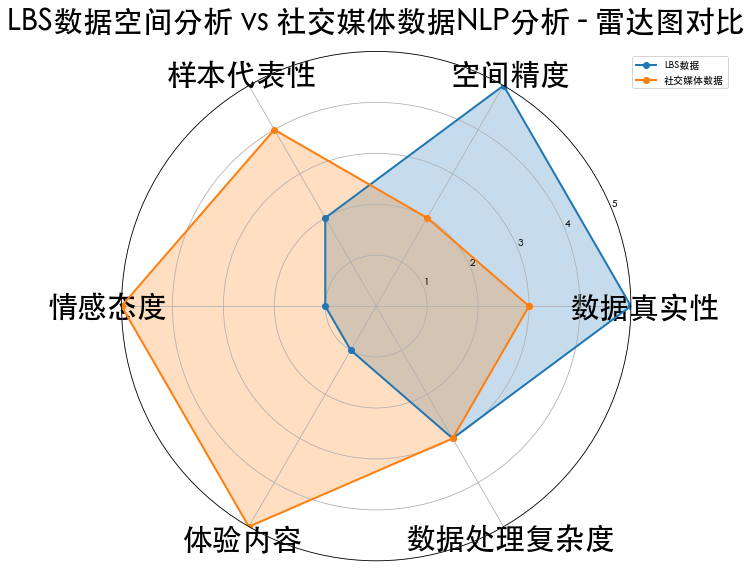

📊 各维度得分对比（1-5分制）:
----------------------------------------
数据真实性     : LBS数据 5分 | 社交媒体数据 3分
空间精度      : LBS数据 5分 | 社交媒体数据 2分
样本代表性     : LBS数据 2分 | 社交媒体数据 4分
情感态度      : LBS数据 1分 | 社交媒体数据 5分
体验内容      : LBS数据 1分 | 社交媒体数据 5分
数据处理复杂度   : LBS数据 3分 | 社交媒体数据 3分

📈 优势分析:
LBS数据优势: 数据真实性、空间精度
社交媒体数据优势: 样本代表性、情感态度、体验内容


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 指定字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
my_font = FontProperties(fname=font_path)

# 数据定义（1-5分制）
categories = ['数据真实性', '空间精度', '样本代表性', '情感态度', '体验内容', '数据处理复杂度']

# LBS数据得分（复杂度越高分数越低，所以取反）
lbs_scores = [5, 5, 2, 1, 1, 3]  # 数据处理复杂度：3->2（复杂度高，得分低）

# 社交媒体数据得分
social_scores = [3, 2, 4, 5, 5, 3]  # 数据处理复杂度：2->3（相对简单）

# 将数据转换为雷达图需要的格式
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # 闭合图形

lbs_scores += lbs_scores[:1]  # 闭合数据
social_scores += social_scores[:1]  # 闭合数据

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

# 绘制LBS数据线
ax.plot(angles, lbs_scores, 'o-', linewidth=2, label='LBS数据', color='#1f77b4')
ax.fill(angles, lbs_scores, alpha=0.25, color='#1f77b4')

# 绘制社交媒体数据线
ax.plot(angles, social_scores, 'o-', linewidth=2, label='社交媒体数据', color='#ff7f0e')
ax.fill(angles, social_scores, alpha=0.25, color='#ff7f0e')

# 设置标签（注意加 fontproperties）
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=30, fontproperties=my_font)

# 设置刻度
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10, fontproperties=my_font)
ax.grid(True)

# 设置标题
plt.title('LBS数据空间分析 vs 社交媒体数据NLP分析 - 雷达图对比',
          fontsize=30, fontweight='bold', pad=20, fontproperties=my_font)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=30, prop=my_font)
plt.tight_layout()
plt.show()

# 打印数据对比
print("📊 各维度得分对比（1-5分制）:")
print("-" * 40)
for i, category in enumerate(categories):
   print(f"{category:10s}: LBS数据 {lbs_scores[i]}分 | 社交媒体数据 {social_scores[i]}分")

print("\n📈 优势分析:")
print("LBS数据优势: 数据真实性、空间精度")
print("社交媒体数据优势: 样本代表性、情感态度、体验内容")